# EXPLORATORY DATA ANALYSIS - Traffic Management Desk Perspective

     # DataAnalysis and Visulatization 
     
     # Analysis :: To help on Traffic Management Desk for insights on Accidents occuring in U.S
     
     # Dataset U.S accidents data [2016-2021]

     # Data set downloaded from Kaggle has 2845342 rows and 47 Columns .
     
     # Numpy,Pandas,Seaborn,Matplotlib actively used.

# Steps Involved:


1.PREVIEW DATA - Read and know info about data.


2.DATA PREPARATION AND CLEANING - To prepare data for analysis.


3.EXPLORATORY DATA ANALYSIS AND VISUALIZATION - Primary goal of project to analyse, visulaise and get inferences.


4.ANSWERS - Based on our analysis.


5.SUMMARIZE and INFERENCES - Give Inferences based on analysis performed and summarize on scope of further work.



# GOALS:

      1. Figure out the pattern of Accidents(Increasing or Decreasing) Year by Year
      
      2. Which states has Maximum No.of Accidents?
            
      3. Figure out 3 states with most accidents and their impact of accidents to the Traffic.
      
      4. Factors that might be considered for analysis in scope of states.
      
      5. Deeper analysis to cities with most accidents.
      
      6. Analysis on factors that play vital role on traffic
      
          6a) What day of week has most accidents?
          
          6b) What hour of the day has most accidents?
          
          6c) Which month on a year encounter more accidents?
      
  


# ANSWERS - Based on our analysis.(mentioned for profile need)

       1. YEAR ON YEAR COMPARISON:
                           
              * The accident pattern of 2019,2020,2021 taken in analysis:
                      
                      - 2020 had 2 months of ALMOST NO ACCIDENTS - Impact of COVID LOCKDOWN.
                      - Patterns for rest of year in 2020 and 2019,2021 are similiar.
                      - Very slight increase in maximum No.of Accidents 
                      - No decrease in accidents happening.
       
       2. U.S states with most accidents :
                  
               * TEXAS,CALIFORNIA,FLORIDA,OREGON are 4 states with top positon in accident encounters.
                    
                     - Geograhical position had no influence in Initial analysis as all 4 states lie on four direction.
                       can have scope of change on detailed analysis.
               
       3. Top 3 states TX,CA,FL are considered and the impact of the accidents is analaysed based on severity index:
       
               * All 3 states fall in the category of 2 in getting affected by Accidents.
               
                    - Accident spot Handling is good but had to work on bringing down severity scale to 1.
                    - Texas have more forecast in bringing scale 3 to down as well.
                       
        4. Factors to be considered in states to influence:
             
               * Analysis of accident Numbers and Population Index of these above 3 states is made.
                      
                     - Florida has less population but more accidents when compared to Texas.
                     - chances that statistics of some of the U.S states like NY not present in Dataset.
                     - Texas has to be given detailed extended analysis on this perspective.
        
        5. Analysis cities with most accidents:
                
                * Could find Accidents are cummulative in 500 cities in higher number but 11000 cities have very few accidents.
                
                * That cities with Higher No.of Accidents can be taken for further detailed analysis and Accident Management 
                  Solutions can be figured out.
                  
        6. Analysis on Hours of Day with maximum Accidents :
        
                * It is not the perfect Gaussian Curve to Indicate maximum but more frequent in between 12 noon-4 pm
                  also in 7 am to 9am sessions.
                  
                     - can be analysed with these hours as more flowing in traffic time related to school/office hrs.
       
           Analysis on Days of Week  with maximum Accidents :
           
                * Mon,Wed,Fri,Sat & Sun is analysed.
                    
                     - In week days most accident happen in School/office work hrs as mentioned above.
                     - In weekends there is less accident compared to weedays.
                     - In Saturdays more accident happening time is in late nights could be impact of Night life.
                     
           Analysis on Months of Year with maximum Accidents :
                    
                 * Exponentially Increase during the Year end.
                 
                      - More accidents occur during Winter Months.
                    
                      - Can be because of snow, Visibilty etc can be inferred on detailed analysis.
                      

In [130]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

# 1.PREVIEW DATA - Read and know info about data.

                  Get all details about dataset to gain knowledge about factors to analyse.

In [177]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\python\EDA project\US_Accidents_Dec21_updated.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [132]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [133]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

# 2.DATA PREPARATION AND CLEANING - To prepare data for analysis.

           * Finding columns with Missing Values.
           * Finding Missing percentages to check impact.
           * Droping Irrelevant columns.
           * Filling missing data with possible values over the Columns of interest for this Analysis.

In [134]:
#checking NaN values Presence pick columns of interest
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [135]:
#percentage of missing values
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

<AxesSubplot:>

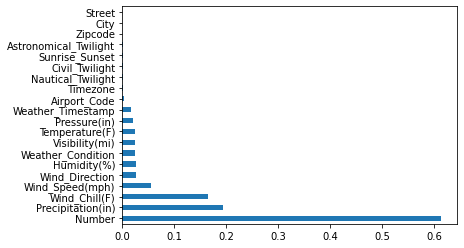

In [136]:
#plot to analyse impact on Dataset
missing_percentages[missing_percentages!=0].plot(kind='barh')


In [137]:
#Droping Irrelevant columns.
df.drop(labels=['Zipcode','Airport_Code','Description','Nautical_Twilight','Civil_Twilight','Astronomical_Twilight','End_Lat','End_Lng'],axis=1)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Number,Street,Side,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,NaN,Outerbelt E,R,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,NaN,I-70 E,R,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,NaN,I-75 S,R,...,True,False,False,False,False,False,False,False,False,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,NaN,I-77 N,R,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,NaN,I-75 S,R,...,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,NaN,Pomona Fwy E,R,...,False,False,False,False,False,False,False,False,False,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,NaN,I-8 W,R,...,False,False,False,False,False,False,False,False,False,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,NaN,Garden Grove Fwy,R,...,True,False,False,False,False,False,False,False,False,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,NaN,San Diego Fwy S,R,...,False,False,False,False,False,False,False,False,False,Day


Filling missing data with possible values over the Columns of interest for this Analysis.


DATA CLEANING : City ,Timestamp,Numberwith possible values and checking on the data cleaning being performed.

In [138]:
df['Weather_Timestamp'].interpolate(method="time",inplace=True)
df['City'].fillna('nocity',inplace=True)
df['Number'].fillna(0.0,inplace=True)
df.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                        0
Street                        2
Side                          0
City                          0
County                        0
State                         0
Zipcode                    1319
Country                       0
Timezone                   3659
Airport_Code               9549
Weather_Timestamp         50736
Temperature(F)            69274
Wind_Chill(F)            469643
Humidity(%)               73092
Pressure(in)              59200
Visibility(mi)            70546
Wind_Direction            73775
Wind_Speed(mph)          157944
Precipitation(in)        549458
Weather_Condition         70636
Amenity                       0
Bump    

# 3.EXPLORATORY DATA ANALYSIS AND VISUALIZATION 


        * YEAR ON YEAR COMPARISON FOR NO.OF ACCIDENTS OCCURING IN U.S[2019,2020,2021].
    
    
        * U.S STATES WITH MOST ACCIDENTS AND VISUALIZATION.
        
        
        * TOP 3 STATES WITH MOST ACCIDNTS AND HOW SEVERE THEIR TRAFFIC IS AFFECTED BY THE ACCIDENTS.
        
        
        * STATES WITH MOST ACCIDENTS AND COMPARISON TO THEIR POPULATION INDEX(EXTERNAL DATA RESEARCH COMPARISON).
        
        
        * ANALYSING DATA ON CITIES WITH MOST ACCIDENTS HAPPENING.
        
        
        * ANALYSIS DAYS OF THE WEEK AND HOURS OF A DAY WHEN MOST ACCIDENTS OCCUR.
        
        
        * WHEN MOST ACCIDENTS OCCUR IN A YEAR BASED ON MONTHS.
        
        



 # Year on year comparison of no.of accidents occuring in U.S [2019,2020,2021]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Start_Time'>

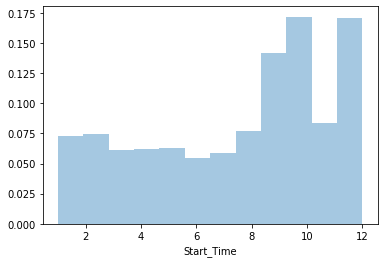

In [180]:
#ACCIDENTS IN YEAR 2019

df.Start_Time=pd.to_datetime(df.Start_Time)
data_2019=df.Start_Time[df.Start_Time.dt.year==2019]
sns.distplot(data_2019.dt.month, bins=12 ,kde=False , norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

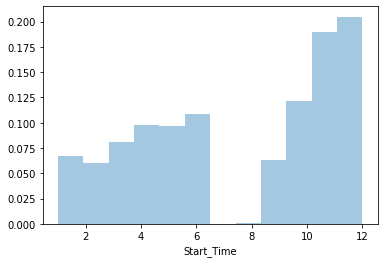

In [142]:
#ACCIDENTS IN YEAR 2020

data_2020=df.Start_Time[df.Start_Time.dt.year==2020]
sns.distplot(data_2020.dt.month, bins=12 ,kde=False , norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

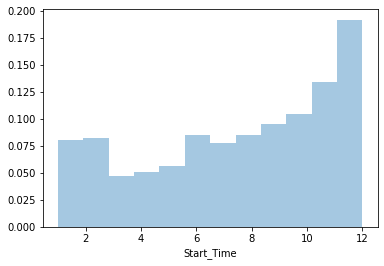

In [144]:
#ACCIDENTS IN YEAR 2021

data_2021=df.Start_Time[df.Start_Time.dt.year==2021]
sns.distplot(data_2021.dt.month, bins=12 ,kde=False , norm_hist=True)

# U.S states with most no.of accidents and visualization of data.

In [145]:
len(df['State'].unique())
state_mostaccidents=df['State'].value_counts().head(10)
state_mostaccidents

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

In [146]:
import plotly.graph_objects as go
df_state = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=df_state.index,
    z = df_state.values.astype(float),  # Data to be color-coded
    locationmode = 'USA-states',     # set of locations match entries in `locations`
    colorscale = 'blugrn',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa', # limite map scope to USA
)


# State wise analysis on Top 3 states with most accidents happening and the impact of the accident in traffic as by their severity.

In [148]:
#Accidents are grouped by severity of their impact on traffic.

accidents_severity = df.groupby('Severity').count()['ID']
accidents_severity

Severity
1      26053
2    2532991
3     155105
4     131193
Name: ID, dtype: int64

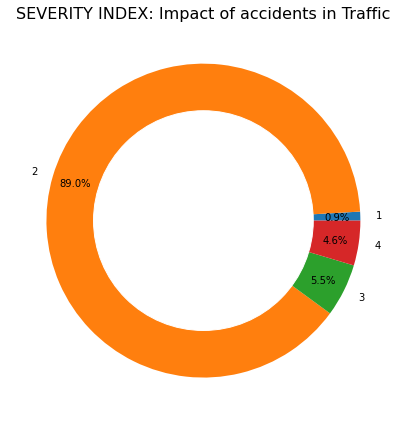

In [169]:
 #Let's visualize that

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("SEVERITY INDEX: Impact of accidents in Traffic",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

#around 4.6% of accident occcur severly

In [151]:
#impact of accidents in Traffic by percentage
    
df['Severity'].value_counts(normalize=True)

2    0.890224
3    0.054512
4    0.046108
1    0.009156
Name: Severity, dtype: float64

PICK TOP 3 STATES HAVING MOST ACCIDENTS CALIFORNIA,TEXAS and FLORIDA

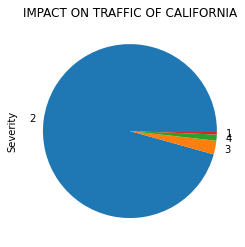

In [170]:
# CA Traffic impact 

filt= df['State']=='CA'
Severity_pie=df.loc[filt]['Severity'].value_counts().plot(kind='pie', y='points',title='IMPACT ON TRAFFIC OF CALIFORNIA')


<AxesSubplot:title={'center':'IMPACT ON TRAFFIC OF FLORIDA'}, ylabel='Severity'>

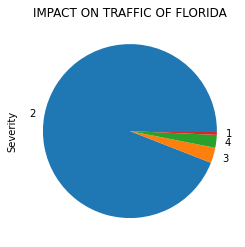

In [171]:
# FL Traffic impact 

filt= df['State']=='FL'
df.loc[filt]['Severity'].value_counts().plot(kind='pie', y='points',title='IMPACT ON TRAFFIC OF FLORIDA')

<AxesSubplot:title={'center':'IMPACT ON TRAFFIC OF TEXAS'}, ylabel='Severity'>

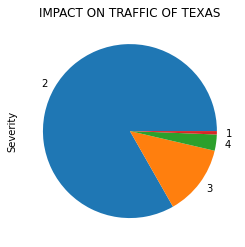

In [172]:
# TX Traffic impact 

filt= df['State']=='TX'
df.loc[filt]['Severity'].value_counts().plot(kind='pie', y='points',title='IMPACT ON TRAFFIC OF TEXAS')


# Comparison on Top 3 states having most No.of accidents with their Population Index(External data research)

<AxesSubplot:title={'center':'IMPACT ON TRAFFIC'}, ylabel='State'>

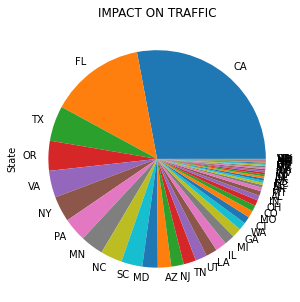

In [147]:
#plotting which state has more accidents.

df['State'].value_counts().plot(kind='pie', y='points',title='IMPACT ON TRAFFIC',figsize=(5, 5))


EXTERNAL DATA : POPULATION COMPARISON OF U.S STATES

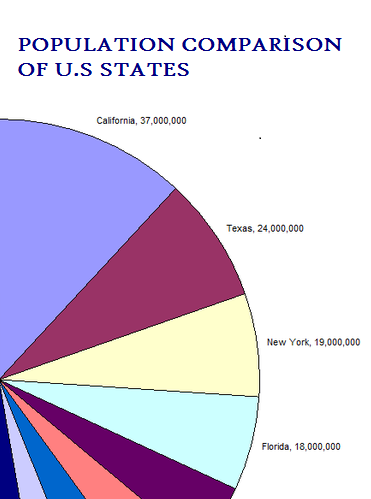

# Analysing  data with further down to cities with most accidents happening

<AxesSubplot:xlabel='City'>

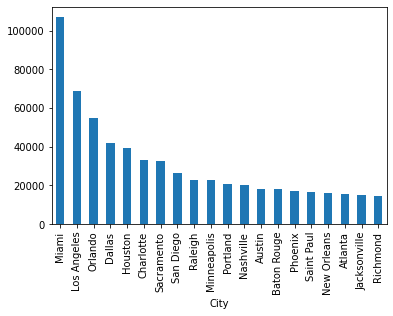

In [155]:
# Finding the top 20 cities with most number of accidents
df.groupby('City').size().sort_values(ascending=False).head(20).plot(kind='bar')

In [156]:
#Median value shows could be possibility of many cities having very few accidents
city_acc_median =  df['City'].value_counts()
print("Median=",city_acc_median.median())

# Which of the cities has most and  fewer no.of accidents
cities_by_accident=df.City.value_counts()
high_acc_cities=cities_by_accident[cities_by_accident >= 1000] 
low_acc_cities=cities_by_accident[cities_by_accident < 1000] 
print("High accident cities=",len(high_acc_cities))
print("Low accident cities=",len(low_acc_cities))



Median= 20.0
High accident cities= 496
Low accident cities= 11186


<AxesSubplot:xlabel='City', ylabel='Count'>

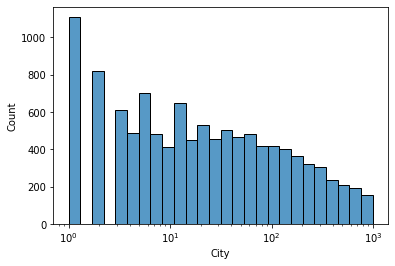

In [157]:
#PLOT THE DATA of low accident cities and High accident cities

sns.histplot(low_acc_cities, log_scale=True)


<AxesSubplot:xlabel='City', ylabel='Count'>

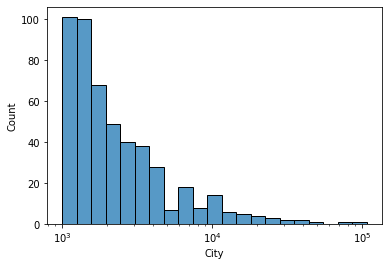

In [158]:
sns.histplot(high_acc_cities, log_scale=True)

# Analysing the Days of week and Time in a day when most accidents occur

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

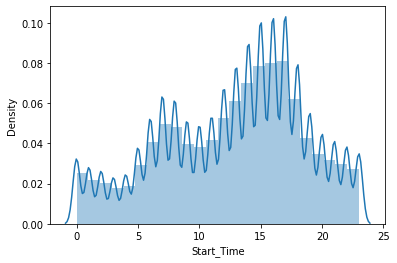

In [175]:
#peak accidents happening HOURS IN A DAY

sns.distplot(df.Start_Time.dt.hour, bins=24 ,kde=True, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

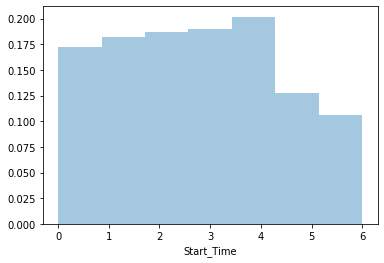

In [173]:
#peak accidents happening DAYS OF A WEEK

sns.distplot(df.Start_Time.dt.dayofweek, bins=7 ,kde=False , norm_hist=True)


#peak accidents happening DAYS OF A WEEK    :::     ANALYSIS DAYS IN WORKING DAYS AND WEEKEND

<AxesSubplot:xlabel='Start_Time'>

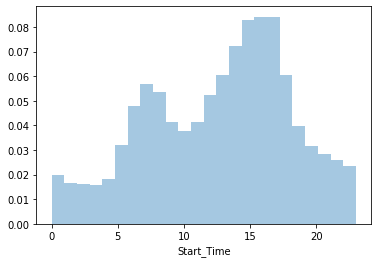

In [161]:
mon_start_time=df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mon_start_time.dt.hour, bins=24 ,kde=False , norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

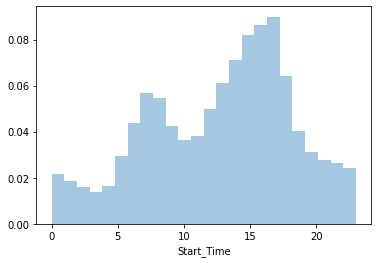

In [162]:
wed_start_time=df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.distplot(wed_start_time.dt.hour, bins=24 ,kde=False , norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

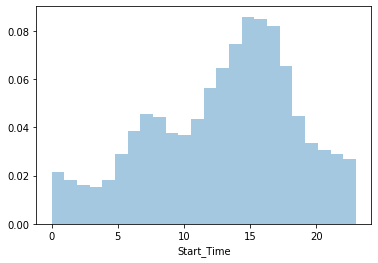

In [164]:
fri_start_time=df.Start_Time[df.Start_Time.dt.dayofweek == 4]
sns.distplot(fri_start_time.dt.hour, bins=24 ,kde=False , norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

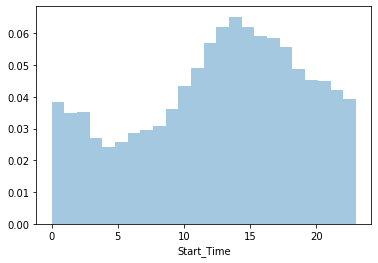

In [163]:
sat_start_time=df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(sat_start_time.dt.hour, bins=24 ,kde=False , norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

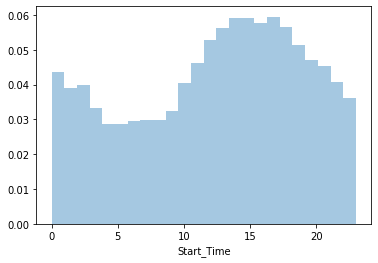

In [165]:
sundays_start_time=df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24 ,kde=False , norm_hist=True)


# Analysing Months in a Year when most accident happen.

<AxesSubplot:xlabel='Start_Time'>

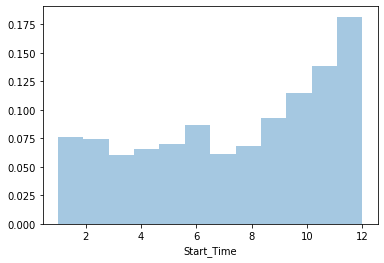

In [166]:
sns.distplot(df.Start_Time.dt.month, bins=12 ,kde=False , norm_hist=True)



# ANSWERS - Based on our analysis.

       1. YEAR ON YEAR COMPARISON:
                           
              * The accident pattern of 2019,2020,2021 taken in analysis:
                      
                      - 2020 had 2 months of ALMOST NO ACCIDENTS - Impact of COVID LOCKDOWN.
                      - Patterns for rest of year in 2020 and 2019,2021 are similiar.
                      - Very slight increase in maximum No.of Accidents 
                      - No decrease in accidents happening.
       
       2. U.S states with most accidents :
                  
               * TEXAS,CALIFORNIA,FLORIDA,OREGON are 4 states with top positon in accident encounters.
                    
                     - Geograhical position had no influence in Initial analysis as all 4 states lie on four direction.
                       can have scope of change on detailed analysis.
               
       3. Top 3 states TX,CA,FL are considered and the impact of the accidents is analaysed based on severity index:
       
               * All 3 states fall in the category of 2 in getting affected by Accidents.
               
                    - Accident spot Handling is good but had to work on bringing down severity scale to 1.
                    - Texas have more forecast in bringing scale 3 to down as well.
                       
        4. Factors to be considered in states to influence:
             
               * Analysis of accident Numbers and Population Index of these above 3 states is made.
                      
                     - Florida has less population but more accidents when compared to Texas.
                     - chances that statistics of some of the U.S states like NY not present in Dataset.
                     - Texas has to be given detailed extended analysis on this perspective.
        
        5. Analysis cities with most accidents:
                
                * Could find Accidents are cummulative in 500 cities in higher number but 11000 cities have very few accidents.
                
                * That cities with Higher No.of Accidents can be taken for further detailed analysis and Accident Management 
                  Solutions can be figured out.
                  
        6. Analysis on Hours of Day with maximum Accidents :
        
                * It is not the perfect Gaussian Curve to Indicate maximum but more frequent in between 12 noon-4 pm
                  also in 7 am to 9am sessions.
                  
                     - can be analysed with these hours as more flowing in traffic time related to school/office hrs.
       
           Analysis on Days of Week  with maximum Accidents :
           
                * Mon,Wed,Fri,Sat & Sun is analysed.
                    
                     - In week days most accident happen in School/office work hrs as mentioned above.
                     - In weekends there is less accident compared to weedays.
                     - In Saturdays more accident happening time is in late nights could be impact of Night life.
                     
           Analysis on Months of Year with maximum Accidents :
                    
                 * Exponentially Increase during the Year end.
                 
                      - More accidents occur during Winter Months.
                    
                      - Can be because of snow, Visibilty etc can be inferred on detailed analysis.
                      

# INFERENCES 

        1. No Effective measures seem to have been implemented to develop on Accident control.
        
        2. Initial analysis : Geographical position not a role.
        
        3. Handling is Decent but have scope of Impovement , Texas more need of improvement.
        
        4. Population Index is not directly proportional to No.of Accidents.

        5. Accident numbers , Not equally distributed to all cities , Fewer cities contribute to more accidents.
        
        6. More detailed analysis needed on why more ccidents in second half of Year, analysis on Working hours transit 
           Contributing to more accidents and on late night accidents on saturdays.
           
# SUMMARY

        Initial analysis on requirement scope performed.
        
        Areas of detail analysis requirement specified.

        Detailed analysis with datas such as roundabout, traffic light,visibility, wind speed etc can be performed extensively.
